In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.
pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.
np.set_printoptions(precision=4) # To display values only upto four decimal places.

In [15]:
data=pd.read_csv('D://advertising tv radio paper.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [16]:
# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [17]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

# What are the features?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
What is the response?

Sales: sales of a single product in a given market (in thousands of items)
What else do we know?

Because the response variable is continuous, this is a regression problem.
There are 200 observations (represented by the rows), and each observation is a single market.
Visualizing data using seaborn
Seaborn: Python library for statistical data visualization built on top of Matplotlib

In [7]:

# conventional way to import seaborn
import seaborn as sns

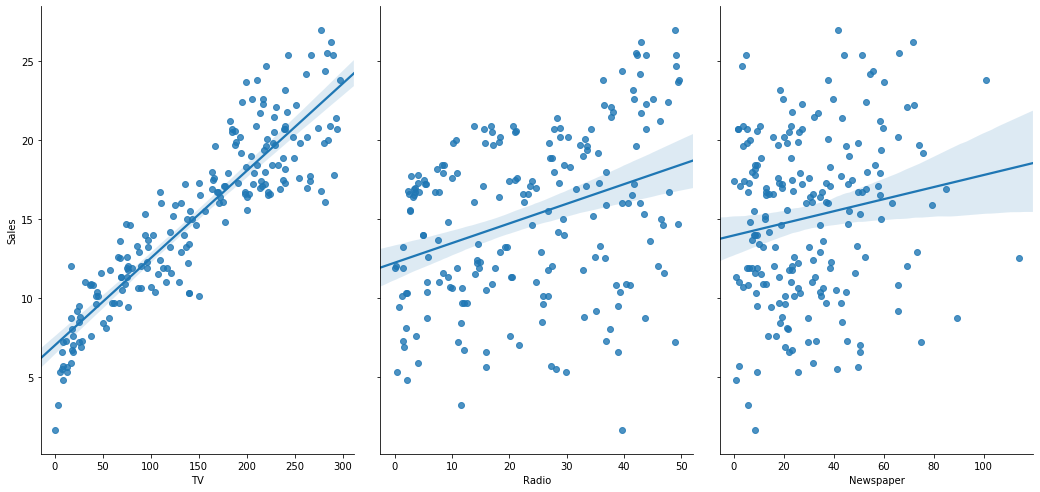

In [18]:

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

# Linear regression
Pros: fast, no tuning required, highly interpretable, well-understood

Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)
In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

Preparing X and y using pandas¶
scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
However, pandas is built on top of NumPy.
Thus, X can be a pandas DataFrame and y can be a pandas series

In [19]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [21]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()


0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

# Splitting X and y into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [24]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting model coefficients

In [25]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

4.633808551125243
[0.0548 0.1022 0.0008]


In [26]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.054837619626216215),
 ('Radio', 0.10218026907174581),
 ('Newspaper', 0.0007878330334789629)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$
How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:

This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

### Making predictions

In [29]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
# We need an evaluation metric in order to compare our predictions with the actual values!

### Computing the errors for our Sales predictions

In [44]:
# calculate ERRORS using scikit-learn
from sklearn.metrics import mean_squared_error, r2_score
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred)) #also called residual
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1.2200517269212685
MSE:  2.2778300140981322
RMSE:  1.5092481618667397


Comparing these metrics:
* Mean Absolute Error (MAE) is the mean of the absolute value of the errors:MAE is the easiest to understand, because it's the average error.
* Mean Squared Error (MSE) is the mean of the squared errors: MSE is more popular than MAE, because MSE "punishes" larger errors. also called residual
* Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors: RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [46]:
# explained variance score: 1 is prefect prediction
print('variance score: %.2f' %r2_score(y_test, y_pred))

variance score: 0.90


In [47]:
#r2 can we rely on the model or not, 0 to 1
r2_score(y_test, y_pred)

0.9049374287145224

In [59]:
#Now compare the actual output values for X_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1 = df.head(25)
print(df1)

     Actual  Predicted
58     23.8  21.297909
40     16.6  18.040564
34     11.9  10.037771
102    19.8  21.049887
184    17.6  20.751534
198    25.5  24.510638
95     16.9  16.845160
4      17.9  15.670019
29     10.5  10.159701
168    17.1  18.881515
171    17.5  15.812708
18     11.3  10.544804
11     17.4  18.884179
89     16.7  15.573684
110    18.4  17.871232
118    15.9  15.326943
159    12.9  13.757147
35     17.8  21.009921
136     9.5  10.052382
59     18.4  19.229324
51     10.7  11.137211
16     12.5  12.120553
44      8.5   8.659822
94     11.5  11.972759
31     11.9  12.623395


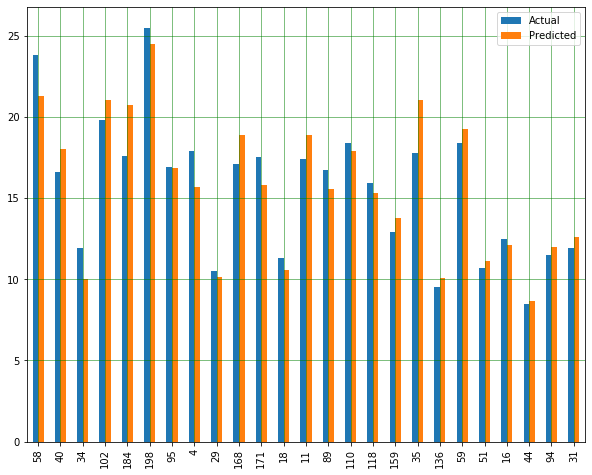

In [60]:
#The comparison plot of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

(array([ 3.,  2.,  6.,  6.,  2., 10.,  8.,  7.,  4.,  2.]),
 array([ 5.3 ,  7.32,  9.34, 11.36, 13.38, 15.4 , 17.42, 19.44, 21.46,
        23.48, 25.5 ]),
 <a list of 10 Patch objects>)

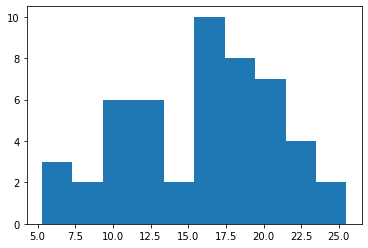

In [48]:
import matplotlib.pyplot as plt
plt.hist(y_test)

(array([2., 3., 6., 5., 3., 8., 6., 7., 9., 1.]),
 array([ 5.4048,  7.3154,  9.226 , 11.1366, 13.0472, 14.9577, 16.8683,
        18.7789, 20.6895, 22.6001, 24.5106]),
 <a list of 10 Patch objects>)

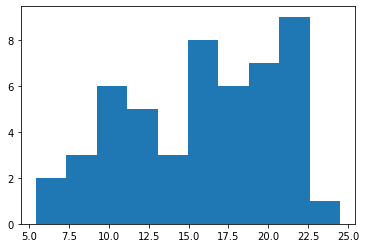

In [49]:
plt.hist(y_pred)

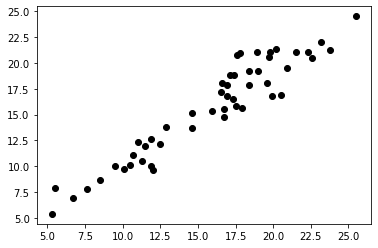

In [50]:
# plot outputs
plt.scatter(y_test,y_pred,color='black')

Text(0.5, 1.0, 'Residual plot')

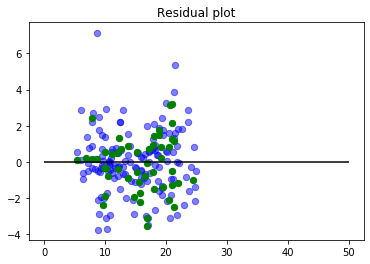

In [53]:
# residual plot
plt.scatter(linreg.predict(X_train),linreg.predict(X_train)-y_train, c='b',s=40, alpha=0.5)
plt.scatter(linreg.predict(X_test),linreg.predict(X_test)-y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax = 50)
plt.title('Residual plot')

# Feature selection
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [42]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5092481618667397


The RMSE did not decrease when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is likely that this feature is useful for predicting Sales, and should not be removed from the model.

In [58]:
import statsmodels.api as sm  ## for stats data display
model=sm.OLS(y_train, X_train).fit()   ## ordinary least square
print('statistical summary')
model.summary()

statistical summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              2755.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                   7.99e-118
Time:                        13:38:23   Log-Likelihood:                         -353.90
No. Observations:                 150   AIC:                                      711.8
Df Residuals:                     148   BIC:                                      717.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0693      0.002     37.905      0.000       0.066       0.073
Radio          0.1794      0.011     16.139      0.000       0.157       0.201
==============================================================================
Omnibus:                        0.184   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.912   Jarque-Bera (JB):                0.031
Skew:                          -0.022   Prob(JB):                        0.985
Kurtosis:                       3.055   Cond. No.                         9.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""